## Practical Work 2

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [10]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot  as plt
from sklearn.metrics import r2_score

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [11]:
X = np.linspace(0,20)
X
a=-2
b=1
y = a*X+b

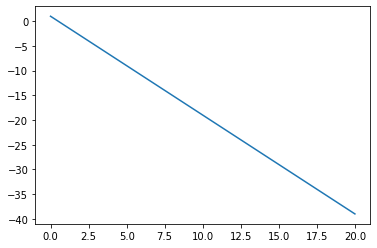

In [12]:
plt.plot(X,y)

#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Note: you can choose any suitable stop criteria.

In [13]:
def gd(X,y,learning_rate,n,theta0,theta1):
    m = len(X)
    listoftheta0 = []
    listoftheta1 = []
    listofcost = []
    listofhypo = np.zeros([len(X),n])
    for i in range(n):
        h = theta0 + theta1*X
        listofhypo[:,i]=h
        j = 1/(2*m) *sum((h-y)**2)
        listofcost.append(j)
        grad1 = 1/m * sum(h-y)
        grad2 = 1/m * sum((h-y)*X)
        theta0 = theta0 - learning_rate *1/m*sum(h-y)
        listoftheta0.append(theta0)
        theta1 = theta1 - learning_rate *1/m*sum((h-y)*X)
        listoftheta1.append(theta1)
    return (listoftheta0,listoftheta1,listofcost,listofhypo,theta0,theta1,h,j)
        
    

#### Try your function with any input parameterss of your choice.

In [14]:
listoftheta0,listoftheta1,listofcost,listofhypo,theta0,theta1,h,j =gd(X,y,0.0001,1000,0,0)


#### Calculate r2 score

In [15]:
r2_score(h, y)


0.9974951507657707

#### Plot loss vs. epochs

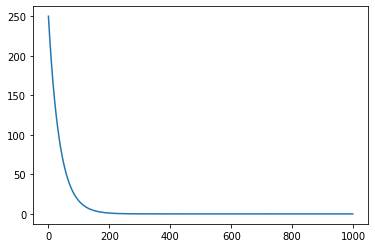

In [16]:
plt.plot(range(1000),listofcost)
plt.show()

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

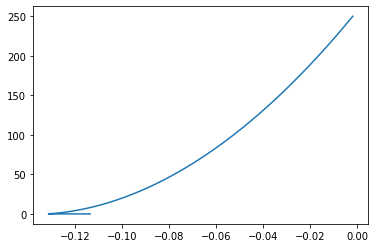

In [17]:
plt.plot(listoftheta0,listofcost)
plt.show()

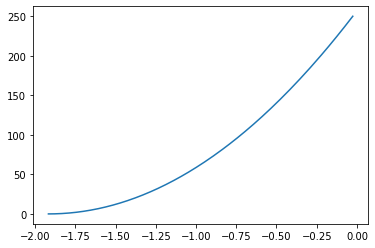

In [18]:
plt.plot(listoftheta1,listofcost)
plt.show()

#### Plot all regression lines till converge

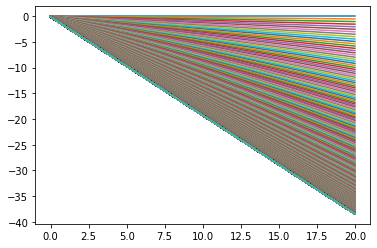

In [19]:
_ = plt.plot(X,listofhypo)
plt.show()

#### Plot the best regression line

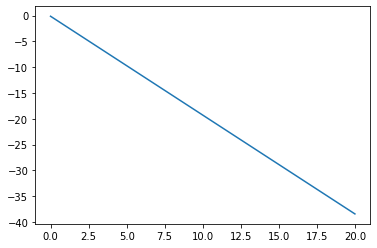

In [20]:
_=plt.plot(X,h)
plt.show()

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

In [21]:
listoftheta0,listoftheta1,listofcost,listofhypo,theta0,theta1,h,j =gd(X,y,0.001,1000,0,0)

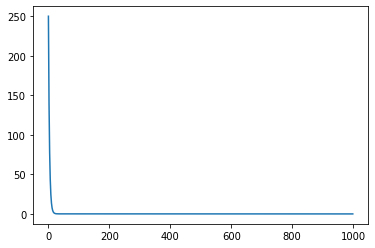

In [22]:
plt.plot(range(1000),listofcost)
plt.show()

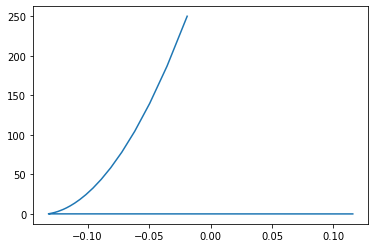

In [23]:
plt.plot(listoftheta0,listofcost)
plt.show()

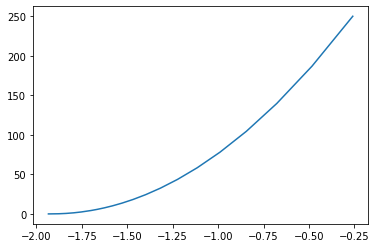

In [24]:
plt.plot(listoftheta1,listofcost)
plt.show()

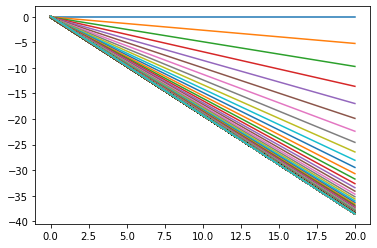

In [25]:
_ = plt.plot(X,listofhypo)
plt.show()

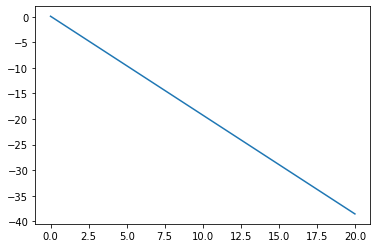

In [26]:
_=plt.plot(X,h)
plt.show()

#### Update the implementation of the Batch GD to be Mini-Batch and rpeat the above plots and evaluations
#### Change batch size and see the effect

In [29]:
def mini_batch(X,y,theta0,theta1,learning_rate2,batch_size):
    
    
    listofftheta0 = []
    listofftheta1 = []
    listoffcost = []
    listoffhypo = []
    for i in range(100):
        for w in range(0, len(X),batch_size):
            m = batch_size
            #print(batch_size)
            y_t=y[w:w+batch_size]
            #print(y_t)
            x_t = X[w:w+batch_size]
            #print(x_t)
            h = theta0 + theta1*x_t
            #print(h)
            listoffhypo.append(h)
            #print(listoffhypo)
            j = 1/(2*batch_size) *sum((h-y_t)**2)
            #print(j)
            listoffcost.append(j)
            #print(listoffcost)
            grad1 = 1/m * sum(h-y_t)
            grad2 = 1/m * sum((h-y_t)*x_t)
            theta0 = theta0 - learning_rate2 *grad1
            #print(theta0)
            listofftheta0.append(theta0)
            #print(listofftheta0)
            theta1 = theta1 - learning_rate2 *grad2
            #print(theta1)
            listofftheta1.append(theta1)
    h2 = theta0 + theta1*X
    return(listofftheta0,listofftheta1,listoffcost,listoffhypo,theta0,theta1,h2,j)


In [30]:
listoftheta02,listof2theta12,listofcost2,listofhypo2,theta2_0,theta2_1,h_2,j_2=mini_batch(X,y,0,0,0.0001,10)

In [39]:
#h_2
r2_score(h_2, y)


0.9974191558792117

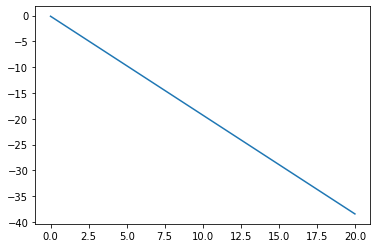

In [32]:
_=plt.plot(X,h_2)
plt.show()

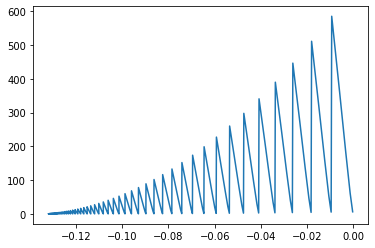

In [33]:
plt.plot(listoftheta02,listofcost2)
plt.show()

## Stochastic GD

#### Update the implementation of the Batch GD to beStochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to Batch and Mini-Batch GD

In [36]:
def Stochastic(X,y,theta0,theta1,learning_rate2,batch_size):
    
    
    listofftheta0 = []
    listofftheta1 = []
    listoffcost = []
    listoffhypo = []
    for i in range(100):
        for w in range(0, len(X),batch_size):
            m = batch_size
            #print(batch_size)
            y_t=y[w:w+batch_size]
            #print(y_t)
            x_t = X[w:w+batch_size]
            #print(x_t)
            h = theta0 + theta1*x_t
            #print(h)
            listoffhypo.append(h)
            #print(listoffhypo)
            j = 1/(2*batch_size) *sum((h-y_t)**2)
            #print(j)
            listoffcost.append(j)
            #print(listoffcost)
            grad1 = 1/m * sum(h-y_t)
            grad2 = 1/m * sum((h-y_t)*x_t)
            theta0 = theta0 - learning_rate2 *grad1
            #print(theta0)
            listofftheta0.append(theta0)
            #print(listofftheta0)
            theta1 = theta1 - learning_rate2 *grad2
            #print(theta1)
            listofftheta1.append(theta1)
    h2 = theta0 + theta1*X
    return(listofftheta0,listofftheta1,listoffcost,listoffhypo,theta0,theta1,h2,j)

In [37]:
listoftheta03,listof2theta13,listofcost3,listofhypo3,theta3_0,theta3_1,h_3,j_3=Stochastic(X,y,0,0,0.0001,1)

In [38]:
h_3

array([-1.42171537e-02, -8.01795648e-01, -1.58937414e+00, -2.37695264e+00,
       -3.16453113e+00, -3.95210963e+00, -4.73968812e+00, -5.52726661e+00,
       -6.31484511e+00, -7.10242360e+00, -7.89000210e+00, -8.67758059e+00,
       -9.46515908e+00, -1.02527376e+01, -1.10403161e+01, -1.18278946e+01,
       -1.26154731e+01, -1.34030516e+01, -1.41906301e+01, -1.49782085e+01,
       -1.57657870e+01, -1.65533655e+01, -1.73409440e+01, -1.81285225e+01,
       -1.89161010e+01, -1.97036795e+01, -2.04912580e+01, -2.12788365e+01,
       -2.20664150e+01, -2.28539935e+01, -2.36415720e+01, -2.44291505e+01,
       -2.52167290e+01, -2.60043075e+01, -2.67918860e+01, -2.75794645e+01,
       -2.83670429e+01, -2.91546214e+01, -2.99421999e+01, -3.07297784e+01,
       -3.15173569e+01, -3.23049354e+01, -3.30925139e+01, -3.38800924e+01,
       -3.46676709e+01, -3.54552494e+01, -3.62428279e+01, -3.70304064e+01,
       -3.78179849e+01, -3.86055634e+01])

In [40]:
r2_score(h_3, y)

0.9979241829988125

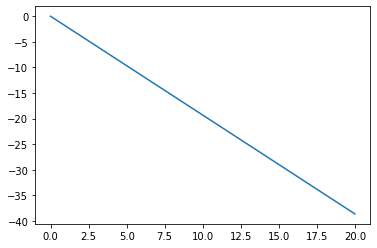

In [41]:
_=plt.plot(X,h_3)
plt.show()

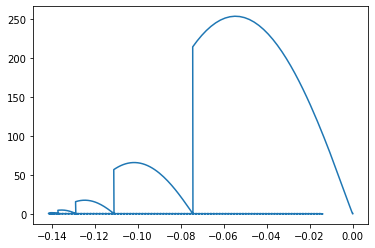

In [42]:
plt.plot(listoftheta03,listofcost3)
plt.show()

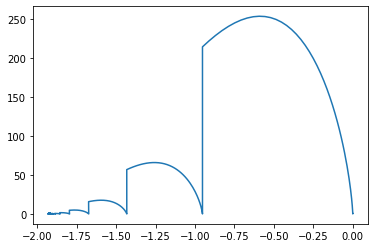

In [43]:
plt.plot(listof2theta13,listofcost3)
plt.show()